# **Project  - Yes bank stock closing price prediction**
**NAME** : Shivam Shashank

# **Project Summary -**

Yes Bank, founded in 2004, is a publicly traded banking institution that offers a diverse range of financial products and services catering to both corporate and retail customers. These include retail banking, asset management, and investment solutions. Being publicly listed allows individuals to invest in the company and become shareholders. However, this also means that the company's valuation is influenced by market sentiment, as stock prices are often affected by public perception and investor speculation.

In this project, we have used a dataset containing historical stock price data of Yes Bank. The dataset includes five key features that are useful for predicting the closing price of the stock. Using this data, we developed machine learning regression models to forecast the closing price. We implemented and evaluated several top-performing models to achieve accurate predictions.

# **GitHub Link -**

**Shivam Shashank** :https://github.com/ShivamShashank11/Yes-Bank-Stock-Closing-Price-Prediction-main

# Problem Statement

Yes Bank is a prominent player in the Indian financial sector. Since 2018, it has garnered significant media attention due to a high-profile fraud case involving its former CEO, Rana Kapoor. This incident sparked curiosity about how such events influence stock performance and whether predictive models—particularly time series forecasting—can effectively capture these market dynamics.

The dataset used in this project contains the bank’s monthly stock prices from its inception. It includes key indicators such as opening price, closing price, highest price, and lowest price for each month, providing a comprehensive view for analysis and prediction.

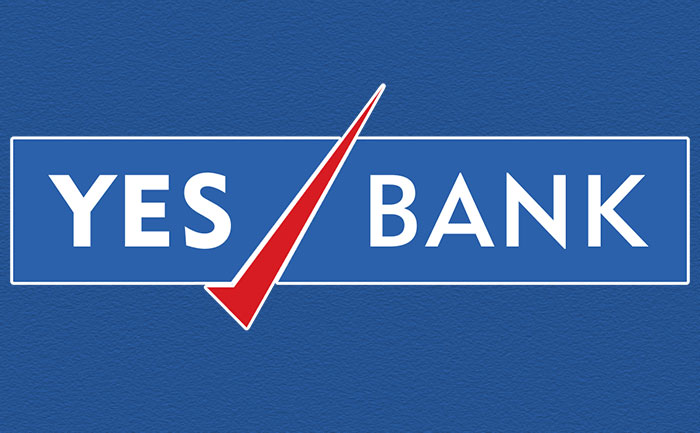



**Project Type - Linear Regression**






# importing libraries

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math  # ✅ Correct here

from datetime import datetime
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (r2_score, mean_squared_error, 
                             mean_absolute_percentage_error, mean_absolute_error)
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')



# Load the Data

In [174]:
import pandas as pd

# Correct full path to your dataset
df = pd.read_csv(r'C:\Users\Shivam Shashank\Desktop\Yes-Bank-Stock-Closing-Price-Prediction-main\Yes-Bank-Stock-Closing-Price-Prediction-main\data_YesBank_StockPrices.csv')

# Show top 5 rows
df.head()



,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [175]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


# Description of Data

In [176]:
len(df)

185

In [177]:
df.shape

(185, 5)

In [178]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [180]:
df['Date'] =pd.to_datetime(df['Date'].apply(lambda x: datetime.strptime(x,'%b-%y')))

In [181]:
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


# EDA

## **Univariate Analysis**

In [182]:
col = list(df.columns)

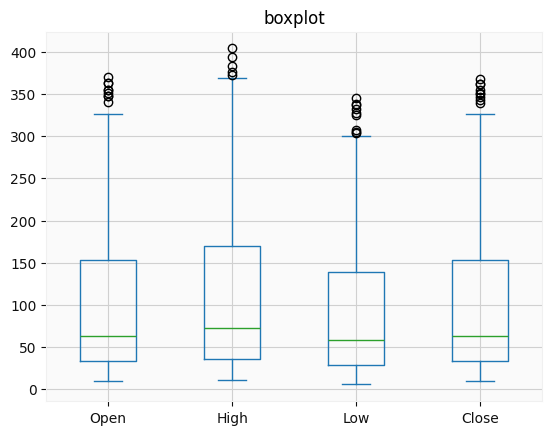

In [183]:




ax = df[col].plot(kind='box', title='boxplot')

plt.show()





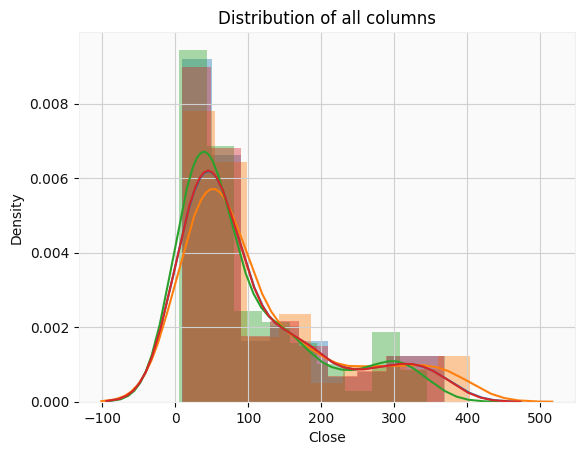

In [184]:
sns.distplot(df['Open'],kde=True)
sns.distplot(df['High'],kde=True)
sns.distplot(df['Low'],kde=True)
sns.distplot(df['Close'],kde=True)
plt.title("Distribution of all columns")
plt.show()



## **Bivariate** **Analysis**

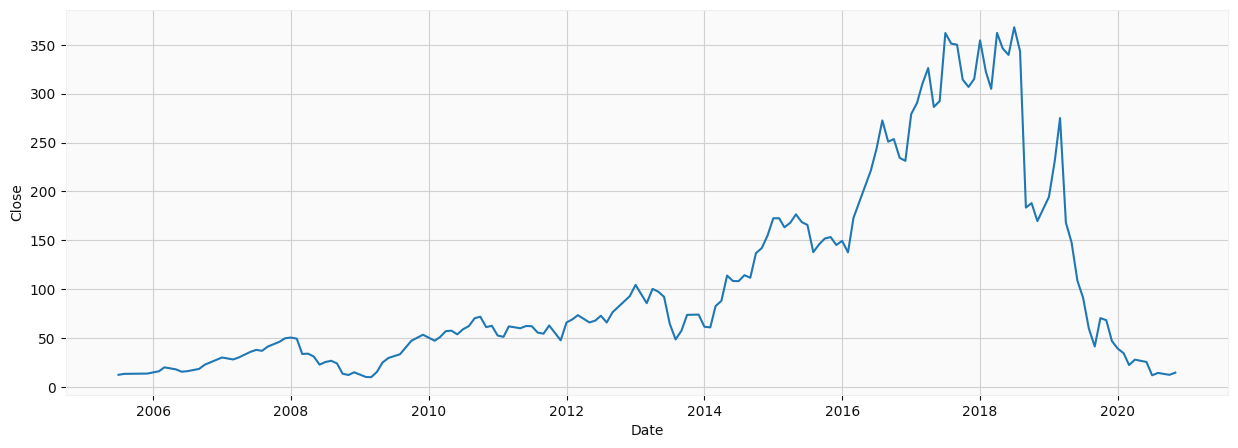

In [185]:

plt.figure(figsize=(15,5))
sns.lineplot(x='Date',y='Close',data=df)
plt.show()

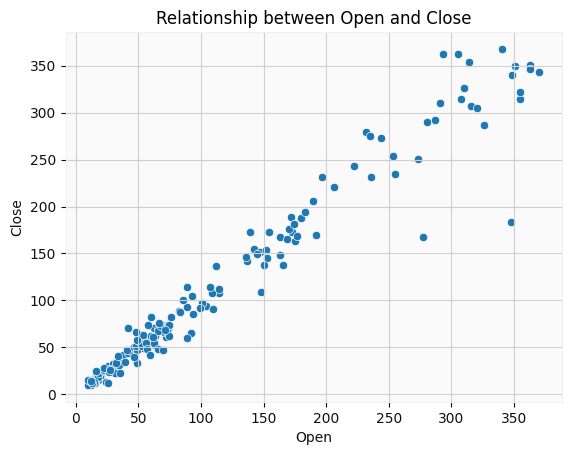

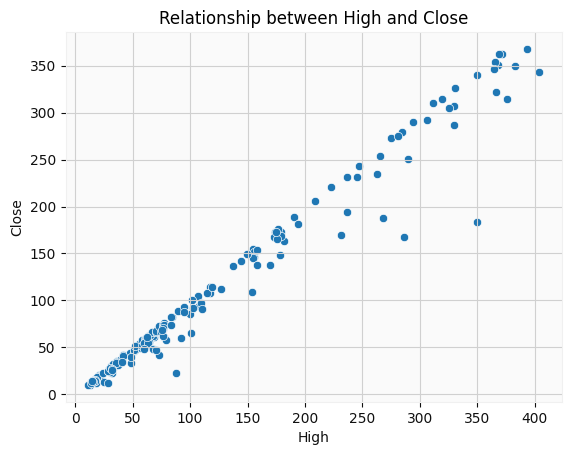

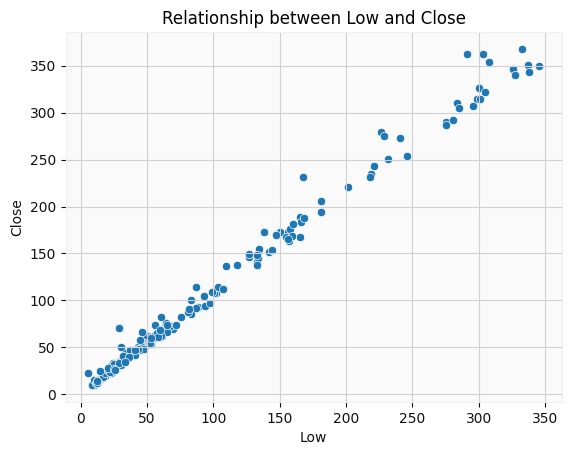

In [186]:
for i in df.columns[1:-1]:
  plt.title(f'Relationship between {i} and Close')
  sns.scatterplot(x=i,y='Close',data=df)
  plt.show()

In [187]:
df.set_index('Date',inplace=True)

In [188]:

!pip install mplfinance

import mplfinance as mpf

df_candle = df[['Open', 'High', 'Low', 'Close']]



Defaulting to user installation because normal site-packages is not writeable


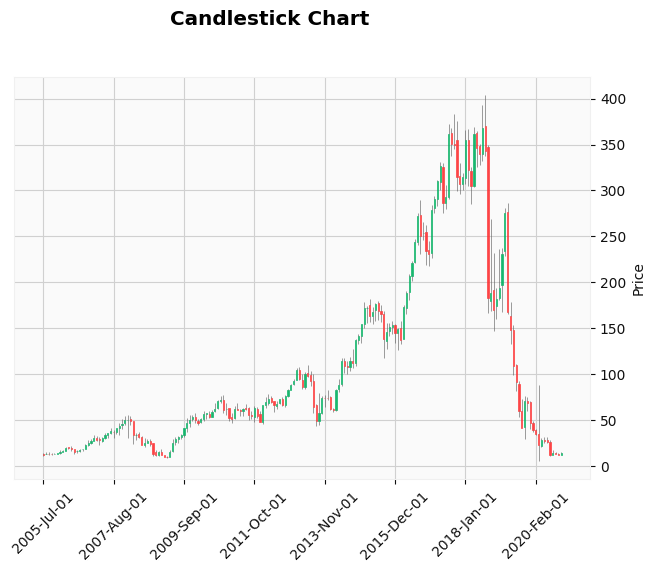

In [189]:

mpf.plot(df_candle, type='candle', style='yahoo', title='Candlestick Chart')

## **Multivariate Analysis**

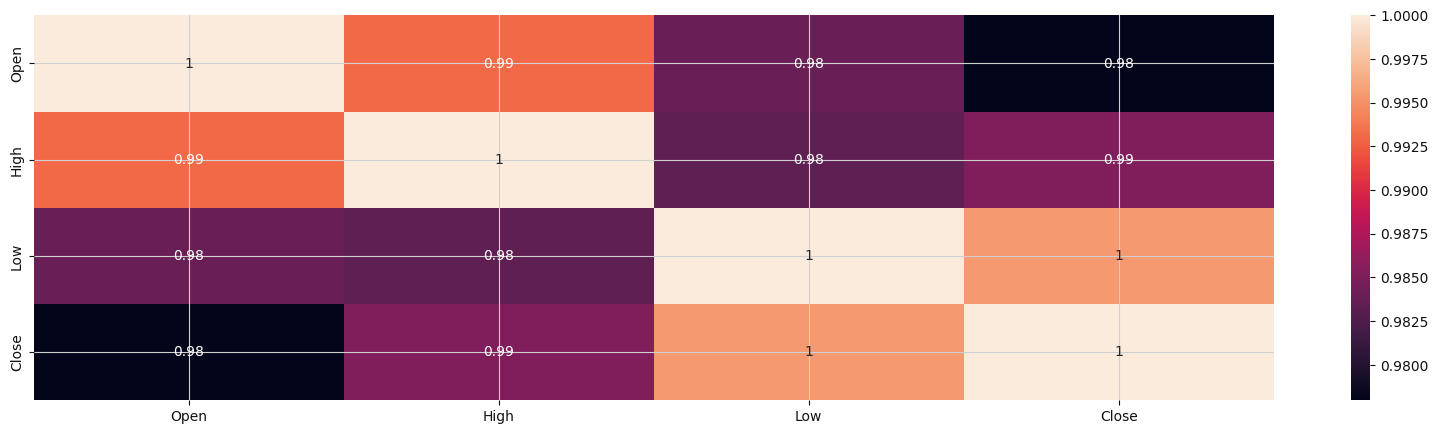

In [190]:
plt.figure(figsize=(20,5))
cor = sns.heatmap(df.corr(),annot=True)

Every feature is extremely corelated with each other, so taking just one feature or average of these features would suffice for our regression model as linear regression assumes there is no multi colinearity in the features.

we will try to reducing multicollinearity using transformation of variables

In [191]:
pw = PowerTransformer(method='box-cox',standardize=True)

In [192]:
cf= df[list(df.columns)]

In [193]:
df['Close']

Date
2005-07-01    12.46
2005-08-01    13.42
2005-09-01    13.30
2005-10-01    12.99
2005-11-01    13.41
              ...  
2020-07-01    11.95
2020-08-01    14.37
2020-09-01    13.15
2020-10-01    12.42
2020-11-01    14.67
Name: Close, Length: 185, dtype: float64

In [194]:
kf = pd.DataFrame(pw.fit_transform(cf))

In [195]:
kf.head()

,0,1,2,3
0,-1.671724,-1.762828,-1.622235,-1.709751
1,-1.704449,-1.700176,-1.518365,-1.635775
2,-1.635576,-1.700867,-1.539820,-1.644731
3,-1.656505,-1.728898,-1.529800,-1.668243
4,-1.645239,-1.771672,-1.493670,-1.636518


In [196]:
kf.rename(columns={0:'Open',1:'High',2:'Low',3:'Close'},inplace=True)

<Axes: >

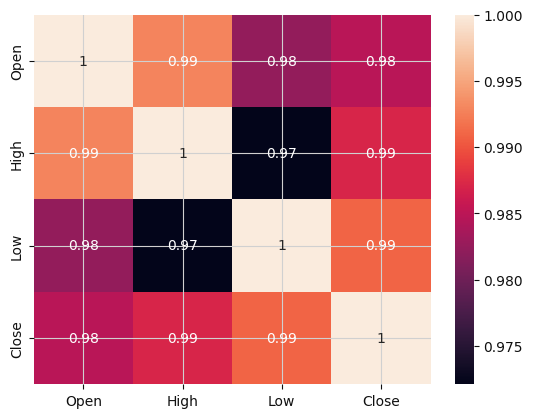

In [197]:
sns.heatmap(kf.corr(),annot=True)

In [198]:
col = list(kf.columns)

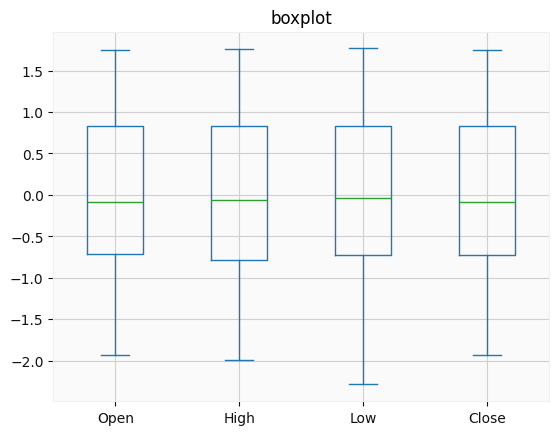

In [199]:
ax = kf[col].plot(kind='box', title='boxplot')

plt.show()

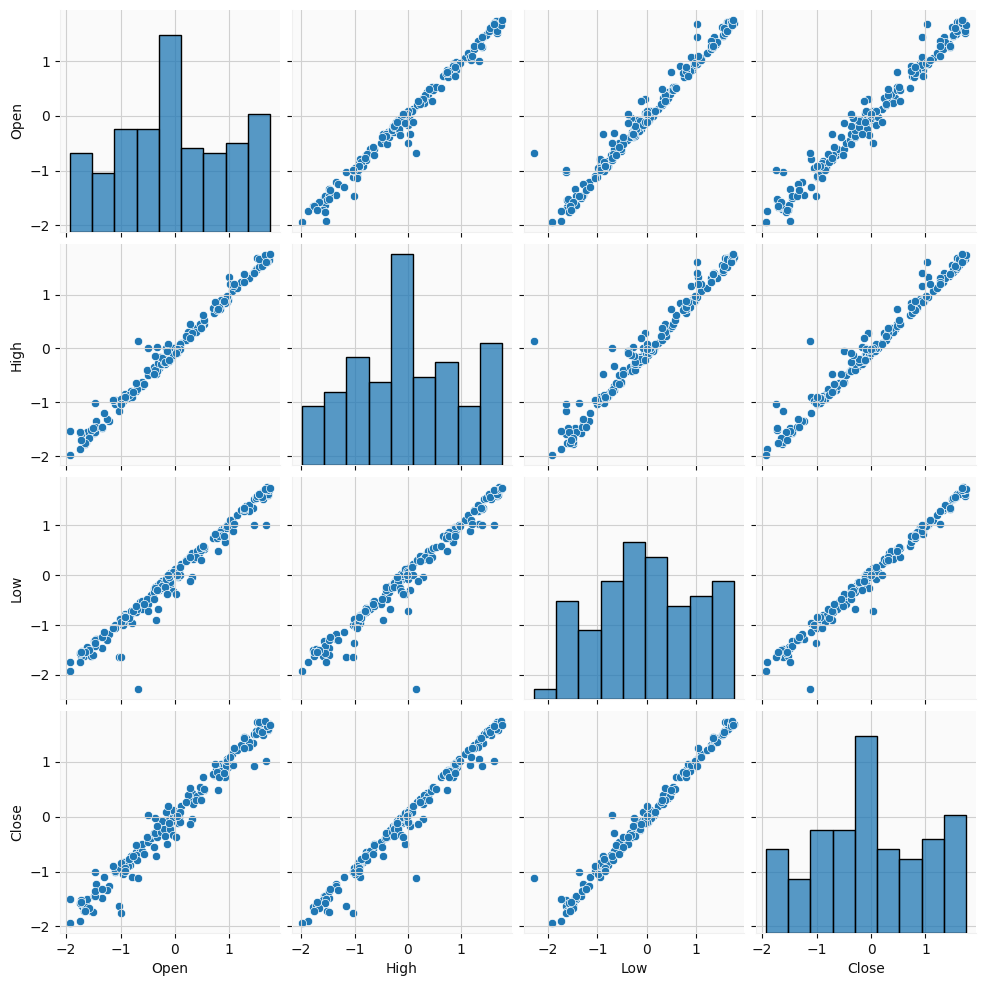

In [200]:
sns.pairplot(kf)

# Data Preprocessing

In [201]:
kf.head()

,Open,High,Low,Close
0,-1.671724,-1.762828,-1.622235,-1.709751
1,-1.704449,-1.700176,-1.518365,-1.635775
2,-1.635576,-1.700867,-1.539820,-1.644731
3,-1.656505,-1.728898,-1.529800,-1.668243
4,-1.645239,-1.771672,-1.493670,-1.636518


In [202]:
dependent_variable = 'Close'
independent_variable = list(set(kf.columns.tolist())-{dependent_variable})

In [203]:
x=df[independent_variable].values

In [204]:
y=df[dependent_variable].values

In [205]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# Linear Regression

In [206]:
reg=LinearRegression()
reg.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [207]:
y_pred = reg.predict(x_test)

In [208]:
linear_r2 = r2_score(y_pred,y_test)

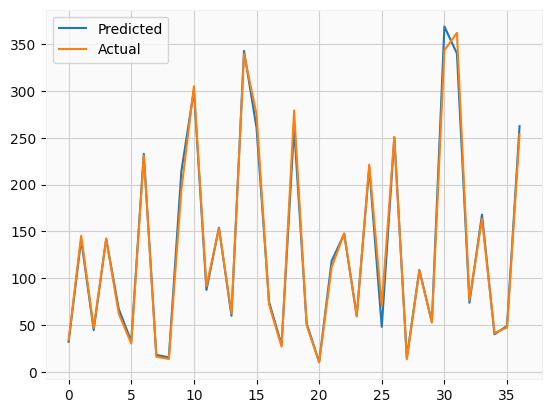

In [209]:
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

# KNN

In [210]:
knn = KNeighborsRegressor()
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
model = GridSearchCV(knn,params,cv=5)

In [211]:
model.fit(x_train,y_train)

,estimator,KNeighborsRegressor()
,param_grid,"{'n_neighbors': [2, 3, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,2


In [212]:
model.best_params_

{'n_neighbors': 2}

In [213]:
knn = KNeighborsRegressor(n_neighbors=2)

In [214]:
knn.fit(x_train,y_train)

,n_neighbors,2
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [215]:
knn_pred = knn.predict(x_test)

In [216]:
r2_knn = r2_score(y_test,knn_pred)

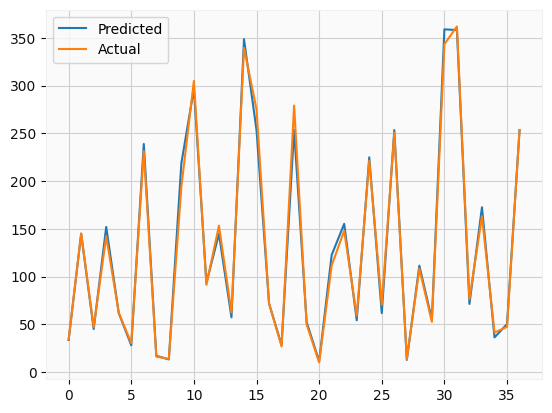

In [217]:
plt.plot(knn_pred)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

# RandomForest

In [218]:
rf = RandomForestRegressor()
params = {'n_estimators':[100,200,300],'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],'max_features':['sqrt', 'log2', None]}
rf_model = GridSearchCV(rf,params,cv=5)

In [219]:
rf_model.fit(x_train,y_train)

,estimator,RandomForestRegressor()
,param_grid,"{'criterion': ['squared_error', 'absolute_error', ...], 'max_features': ['sqrt', 'log2', ...], 'n_estimators': [100, 200, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [220]:
rf_model.best_params_

{'criterion': 'poisson', 'max_features': None, 'n_estimators': 100}

In [221]:
rf = RandomForestRegressor(criterion= 'friedman_mse', max_features= None, n_estimators= 300)

In [222]:
rf.fit(x_train,y_train)

,n_estimators,300
,criterion,'friedman_mse'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [223]:
rf_predict_ = rf.predict(x_test)

In [224]:
rf_r2 = r2_score(y_test,rf_predict_)

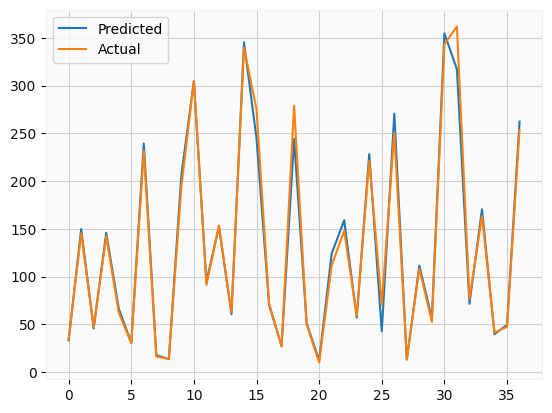

In [225]:
plt.plot(rf_predict_)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

# Ridge Regression

In [226]:
ridge =Ridge()
param = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,0.3,0.7,1,1.2,1.33,1.365,1.37,1.375,1.4,1.5,1.6,1.8,2.5,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, param, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)
ridge_regressor.best_params_


{'alpha': 100}

In [227]:
ridge =Ridge(alpha= 100)

In [228]:
ridge.fit(x_train,y_train)

,alpha,100
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [229]:
y_pred_ridge = ridge.predict(x_test)

In [230]:
ridge_r2 = r2_score(y_test,y_pred_ridge)

In [231]:
ridge_r2

0.9930447012730749

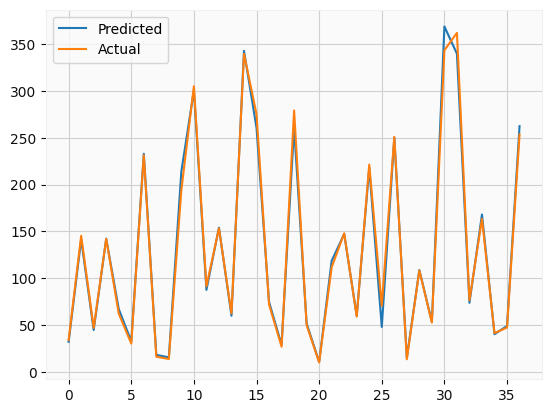

In [232]:
plt.plot(y_pred_ridge)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

#Lasso

In [233]:
lasso =Lasso()
param = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,0.3,0.7,1,1.2,1.33,1.365,1.37,1.375,1.4,1.5,1.6,1.8,2.5,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, param, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(x_train,y_train)

,estimator,Lasso()
,param_grid,"{'alpha': [1e-15, 1e-10, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,1.5


In [234]:
lasso_regressor.best_params_

{'alpha': 1.5}

In [235]:
lasso =Lasso(alpha= 1.6)

In [236]:
lasso.fit(x_train,y_train)

,alpha,1.6
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [237]:
lasso_predict = lasso.predict(x_test)

In [238]:
lasso_r2 = r2_score(lasso_predict,y_test)

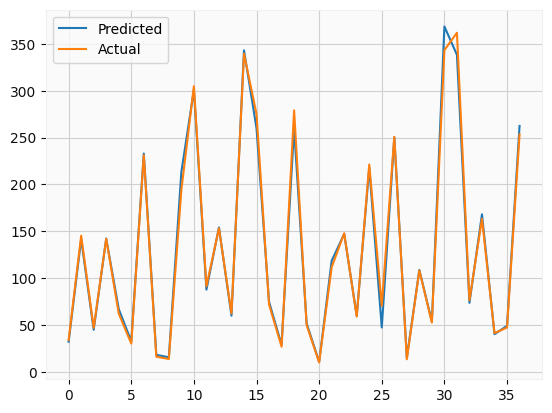

In [239]:
plt.plot(lasso_predict)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

#Elasticnet

In [240]:
elastic =ElasticNet()
param = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,0.001,0.01,0.02,0.03,0.04,1,5,10,20,40,50,60,100],
                          'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
elastic_regressor = GridSearchCV(elastic, param, scoring='neg_mean_squared_error', cv=5)
elastic_regressor.fit(x_train,y_train)

,estimator,ElasticNet()
,param_grid,"{'alpha': [1e-15, 1e-13, ...], 'l1_ratio': [0.1, 0.2, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,5


In [241]:
elastic_regressor.best_params_

{'alpha': 5, 'l1_ratio': 0.1}

In [242]:
elastic =ElasticNet(alpha = 5, l1_ratio = 0.1)

In [243]:
elastic.fit(x_train,y_train)

,alpha,5
,l1_ratio,0.1
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [244]:
elastic_predict = elastic.predict(x_test)

In [245]:
elastic_r2 = r2_score(elastic_predict,y_test)

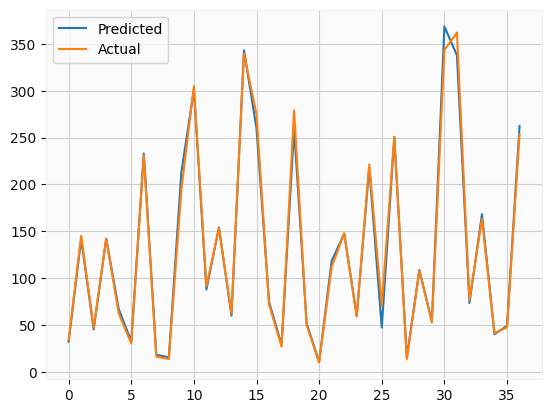

In [246]:
plt.plot(elastic_predict)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

# Evaluation Summary

In [247]:
Report = pd.DataFrame(data={'model':['linear regression','ridge regression','lasso regression','elastic net regression','knn regression','RandomForest Regression'],'r2_score':[linear_r2,ridge_r2,lasso_r2,elastic_r2,r2_knn,rf_r2]})


In [248]:
Report.sort_values(by=['r2_score'],ascending=False,inplace=True)

In [249]:
Report

,model,r2_score
4,knn regression,0.993115
0,linear regression,0.993056
1,ridge regression,0.993045
2,lasso regression,0.992790
3,elastic net regression,0.992704
5,RandomForest Regression,0.984924


# **Conclusions Drawn :**
---

*   **Data visualization revealed a significant drop in stock prices around 2018, which aligns with the fraud case involving Rana Kapoor. This event appears to have had a strong negative impact on investor sentiment.**
*   **The dataset was clean, with no missing or duplicate values identified during preprocessing.**
*   **There are some outliers in our features however this being a very small dataset, dropping those instances will lead to loss of information.**
*   **We found that the distribution of all our variables is positively skewed. so we performed power transformation on them.**
*   **There is a high correlation between the dependent and independent variables. This is a signal that our dependent variable is highly dependent on our features and can be predicted accurately from them.**
*   **We found that there is a rather high correlation between our independent variables. This multicollinearity is however unavoidable here as the dataset is very small.**
*   **We implemented multiple regression models to predict the closing price. Among them, the K-Nearest Neighbors (KNN) regressor performed the best, achieving an impressive R² score of 0.993 and high performance across all evaluation metrics.**

